# All-NBA Players EDA

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

## Preliminary Look at the Data

The first step will be to read in the data from our .csv file which has been compiled from Basketball Reference's [website](https://www.basketball-reference.com/).  

In [2]:
df = pd.read_csv('full_data.csv')

The data looks to have been read in correctly and there is not any abnormalities below.

In [3]:
df

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,All_NBA_Pos,All_NBA_Team,All_NBA_Pts_Won,All_NBA_Pts_Max,All_NBA_Share,All_NBA_1st_Team_Votes,All_NBA_2nd_Team_Votes,All_NBA_3rd_Team_Votes,year,All_NBA_Boolean
0,Kareem Abdul-Jabbar*,C,41,LAL,74,1695,12.9,0.511,0.005,0.250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
1,Mark Acres,C,26,BOS,62,632,8.2,0.507,0.009,0.421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
2,Michael Adams,PG,26,DEN,77,2787,17.5,0.567,0.431,0.363,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
3,Mark Alarie,PF,25,WSB,74,1141,13.3,0.531,0.088,0.202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
4,Randy Allen,SG,24,SAC,7,43,6.9,0.428,0.053,0.105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-1989,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15438,Tremont Waters,PG,24,TOT,3,50,5.4,0.357,0.643,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-2022,False
15439,Derrick White,SG,27,TOT,75,2199,14.8,0.549,0.461,0.294,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-2022,False
15440,Justise Winslow,SF,25,TOT,48,774,13.1,0.479,0.257,0.257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-2022,False
15441,Moses Wright,PF,23,TOT,4,14,18.3,0.470,0.250,0.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-2022,False


Upon examining the data type of each column, it does not seem like there needs to be any changes.

In [109]:
df.shape

(15443, 37)

In [111]:
df.query("All_NBA_Boolean == True").shape

(510, 37)

In [116]:
len(df[df.duplicated()])

0

In [117]:
df.isna().sum()

Player                        0
Pos                           0
Age                           0
Tm                            0
G                             0
MP                            0
PER                           3
TS%                          55
3PAr                         61
FTr                          61
ORB%                          3
DRB%                          3
TRB%                          3
AST%                          3
STL%                          3
BLK%                          3
TOV%                         46
USG%                          3
OWS                           0
DWS                           0
WS                            0
WS/48                         3
OBPM                          0
DBPM                          0
BPM                           0
VORP                          0
player_id                     0
All_NBA_Pos               14047
All_NBA_Team              14047
All_NBA_Pts_Won           14047
All_NBA_Pts_Max           14047
All_NBA_

The dataset consists of 15,443 rows that represent a player and the season that they played. We have 510 rows that have All-NBA players and the season they were selected. No duplicate values existed. There were `NaN` values but they were included in the final form of the data set as they were indicative of that player not registering that relevant statistic in that season (ex. not attempting a 3-point shot would cause `3PAr` to be `NaN`.)

In [44]:
df.dtypes

Player                     object
Pos                        object
Age                         int64
Tm                         object
G                           int64
MP                          int64
PER                       float64
TS%                       float64
3PAr                      float64
FTr                       float64
ORB%                      float64
DRB%                      float64
TRB%                      float64
AST%                      float64
STL%                      float64
BLK%                      float64
TOV%                      float64
USG%                      float64
OWS                       float64
DWS                       float64
WS                        float64
WS/48                     float64
OBPM                      float64
DBPM                      float64
BPM                       float64
VORP                      float64
player_id                  object
All_NBA_Pos                object
All_NBA_Team               object
All_NBA_Pts_Wo

Let's examine all the columns available and a value seen/associated with each column.

In [4]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'player_id',
       'All_NBA_Pos', 'All_NBA_Team', 'All_NBA_Pts_Won', 'All_NBA_Pts_Max',
       'All_NBA_Share', 'All_NBA_1st_Team_Votes', 'All_NBA_2nd_Team_Votes',
       'All_NBA_3rd_Team_Votes', 'year', 'All_NBA_Boolean'],
      dtype='object')

There are 36 predictor variables available in the data set with our response variable being `All_NBA_Boolean` which will indicate if the player was elected to an All-NBA team that season.

In [70]:
len(df.columns)

37

In [69]:
df.head(1).T

,0
Player,Kareem Abdul-Jabbar*
Pos,C
Age,41
Tm,LAL
G,74
MP,1695
PER,12.9
TS%,0.511
3PAr,0.005
FTr,0.25


## Correlation Matrix

The first place to start will be to examine the correlation between the predictor variables in our data set. This will be important because high correlation between predictors may be problematic for the models that are created.

To examine the correlation, a list of columns need to be created. The predictors will be in the list as well as the response variable but variables that are known to have an impact on the response will be excluded. For example, the `All_NBA_Boolean` response variable will be directly correlated to `All_NBA_Pts_Won` or `All_NBA_1st_Team_Votes`. The only one of these "All_NBA_..." variables that will be included besides the response variable is `All_NBA_Share` (share of All-NBA votes) as it will be a fair quanatative measure the All-NBA prowess of a player. 

In [5]:
cols_list = df.columns[0:28].to_list()
cols_list.extend(['All_NBA_Share', 'year', 'All_NBA_Boolean'])

In [120]:
df_abr = df[cols_list]

corr = df_abr.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,All_NBA_Share,All_NBA_Boolean
Age,1.000000,0.057670,0.062129,0.002907,0.032125,0.024038,-0.046980,-0.061290,0.012190,-0.019402,0.049256,-0.039763,-0.061046,0.013484,-0.135168,0.082943,0.092018,0.094785,0.087583,0.053610,0.098513,0.078334,0.078729,0.006021,0.030634
G,0.057670,1.000000,0.854114,0.386762,0.357564,-0.033015,-0.042782,-0.058148,0.042454,-0.000843,0.161816,0.020974,0.012840,-0.140730,0.086832,0.521703,0.676507,0.634997,0.371855,0.409866,0.178497,0.392767,0.407851,0.096506,0.156245
MP,0.062129,0.854114,1.000000,0.481226,0.345470,-0.013287,-0.016723,-0.101946,0.045451,-0.020289,0.281435,0.050857,-0.026437,-0.164878,0.265269,0.725893,0.796570,0.825086,0.383583,0.500346,0.147074,0.454036,0.653035,0.206475,0.298667
PER,0.002907,0.386762,0.481226,1.000000,0.722998,-0.127329,0.166918,0.180647,0.211112,0.233307,0.285624,0.148922,0.174348,-0.306102,0.369764,0.579174,0.469570,0.590870,0.888699,0.888872,0.437357,0.869902,0.562833,0.698197,0.319423
TS%,0.032125,0.357564,0.345470,0.722998,1.000000,0.029444,0.191332,0.010186,0.111188,0.080463,0.056324,-0.042024,0.113543,-0.124778,0.045557,0.414716,0.298555,0.407846,0.758647,0.670429,0.383423,0.675835,0.317578,0.274132,0.125148
3PAr,0.024038,-0.033015,-0.013287,-0.127329,0.029444,1.000000,-0.362745,-0.536022,-0.350578,-0.489574,0.178064,0.058640,-0.341115,-0.193223,-0.017351,-0.015338,-0.126351,-0.061724,-0.067810,0.096415,-0.057064,0.058179,0.029118,0.016226,-0.045749
FTr,-0.046980,-0.042782,-0.016723,0.166918,0.191332,-0.362745,1.000000,0.254643,0.227210,0.272815,-0.089466,-0.013860,0.182110,0.157758,-0.003326,0.108778,0.063045,0.101041,0.182146,0.046723,0.097955,0.071853,0.077451,0.242678,0.088451
ORB%,-0.061290,-0.058148,-0.101946,0.180647,0.010186,-0.536022,0.254643,1.000000,0.489074,0.823069,-0.404180,-0.111729,0.375548,0.058296,-0.013968,-0.013483,0.074490,0.020857,0.135244,-0.017499,-0.097972,-0.049255,-0.053083,0.001063,0.001080
DRB%,0.012190,0.042454,0.045451,0.211112,0.111188,-0.350578,0.227210,0.489074,1.000000,0.896559,-0.337694,-0.163951,0.448525,0.031259,-0.022999,0.083697,0.276162,0.169795,0.177554,0.013315,0.185954,0.077259,0.110230,0.172565,0.109366
TRB%,-0.019402,-0.000843,-0.020289,0.233307,0.080463,-0.489574,0.272815,0.823069,0.896559,1.000000,-0.420792,-0.164512,0.479040,0.048659,-0.019402,0.051945,0.222052,0.125910,0.189669,0.003990,0.074047,0.029646,0.050606,0.128137,0.076029


Examining which predictors are most correlated with each other (correlation > 0.50). We're not including `All_NBA_Share` and `All_NBA_Boolean` since intuitively we know they're highly correlated with one another and they each could represent the response variable.

In [71]:
corr_matrix = df_abr.corr().abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

sol_df = pd.DataFrame(sol).reset_index()
sol_df.rename(columns = {"level_0": "feature_1", "level_1": "feature_2", 0: "correlation"}, inplace = True)

sol_df.query("correlation >= 0.5 & feature_1 not in ('All_NBA_Boolean', 'All_NBA_Share') & feature_2 not in ('All_NBA_Boolean', 'All_NBA_Share')")

,feature_1,feature_2,correlation
0,OWS,WS,0.949795
1,OBPM,BPM,0.943777
2,WS,VORP,0.910833
3,DRB%,TRB%,0.896559
4,OWS,VORP,0.890711
5,PER,OBPM,0.888872
6,PER,WS/48,0.888699
7,WS/48,BPM,0.885443
8,PER,BPM,0.869902
9,G,MP,0.854114


There are many predictor variables with a considerably high correlation between them, which could prove to be problematic. This result is not necessarily surprising as our data set includes a plethora of basic and advanced statistics in the NBA and advanced statistics primarily manipulate the basic statistics. For example, advanced statistics like `PER` (*Player Efficiency Rating*) or `VORP` (*Value Over Replacement Player*) will inevitably draw from the same pool of basic statistics such as field goal percentage. Further, advanced statistics that aggregate statistics on both offense and defense like `WS` (*Win Share*) will be correlated with related predictors that focus only on offense or defense like `OWS` (*Offensive Win Share*). 

## EDA of All-NBA Players

The next phase of the EDA will to solely focus on the rows/players in the data set where the player was selected as an All-NBA selection so we can focus on what the measure of center is for the predictors in the data set.

In [72]:
df_all_NBA = round(df.query('All_NBA_Boolean'),2) # DF of just All-NBA players

df_all_NBA.median().reset_index()

C:\Users\caliz\AppData\Local\Temp\ipykernel_12408\1360446038.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_all_NBA.median().reset_index()


,index,0
0,Age,27.00
1,G,77.00
2,MP,2797.00
3,PER,23.30
4,TS%,0.58
5,3PAr,0.16
6,FTr,0.39
7,ORB%,4.85
8,DRB%,17.95
9,TRB%,11.50


Some takeaways from the dataframe above are that the median value of `Age` indicates that All-NBA players are mostly veterans and not players who have recently entered the league. Further, the median value of `G` demonstrates that these players play a high majority of the 82-game NBA season and tends to contribute to the sentiment that "Availability is the best ability." The median for `PER` is also interesting knowing that a league-average `PER` is always 15.00, which means that these All-NBA players are above average from a `PER` perspective and makes logical sense.

Let's see if there is a difference in the median values for these predictors in different eras of the NBA. This is not a perfect split to find distinct eras in the NBA but the split of the eras will be before and after the year 2000. Later in the project, this split of era will be adjusted and analyzed further.

In [78]:
df_all_NBA['Era'] = np.where(df_all_NBA['year'].str[0] == '1', 'Pre-2000', 'Post-2000')

In [136]:
def percentage_change(col1,col2):
    return ((col2 - col1) / col1) * 100

df_all_NBA_eras = df_all_NBA.groupby('Era').median().T
df_all_NBA_eras['% Change'] = percentage_change(df_all_NBA_eras['Pre-2000'], df_all_NBA_eras['Post-2000'])
df_all_NBA_eras = df_all_NBA_eras[df_all_NBA_eras.index.str.contains("All")==False]
df_all_NBA_eras = df_all_NBA_eras.sort_values(by = '% Change', ascending = False)
df_all_NBA_eras

Era,Post-2000,Pre-2000,% Change
3PAr,0.19,0.06,216.666667
BLK%,1.60,1.20,33.333333
AST%,23.85,18.95,25.857520
DRB%,18.50,16.05,15.264798
OBPM,4.70,4.30,9.302326
USG%,28.95,26.50,9.245283
WS/48,0.20,0.19,5.263158
PER,23.70,22.60,4.867257
TS%,0.58,0.57,1.754386
TRB%,11.50,11.40,0.877193


The data frame above is very indicative to how basketball in the NBA may have changed before and after the year 2000. More specifically, it speaks to the characterstics of what the most elite NBA players have and how that has changed as basketball has evolved. First and foremost, there was over a 200% (!!!) increase in `3PAr` (*3-Point Attempt Rate*) in this new era of the NBA. Players who are dominant from the 3-point line like Stephen Curry have helped fuel this change and cause other elite NBA players to incorporate shooting from a distance in their repertoire. Another considerable change is in `USG%` (*Usage Percentage*) where it seems like All-NBA players in the post-2000 era have nearly 10% higher usage rate, which means these players are more involved when they are on the floor.

On the other end of the spectrum, metrics that speak to how often a player plays like `G` (*Games*) or `MP` (*Minutes Played*) show that players may not need to play as often in a game or play as many games in a season to be of the All-NBA caliber.

# Median of Features Throughout the Seasons

Building off of the last part of the EDA, let's further examine how the measure of center for our predictors (excluding predictors that are related to the response i.e including 'All-NBA') have changed throughout the seasons. 

In [88]:
cols_all_list = ['Age',  
                'PER', 
                'TS%', 
                '3PAr', 
                'FTr',
                'ORB%', 
                'DRB%', 
                'TRB%', 
                'AST%', 
                'STL%', 
                'BLK%', 
                'TOV%', 
                'USG%', 
                'OWS',
                'DWS', 
                'WS',
                'WS/48', 
                'OBPM', 
                'DBPM', 
                'BPM', 
                'VORP',
                'Pos']    
    

Let's examine each of the predictors' median value for each season in the dataset and apply a gradient to demonstrate when the predictor was highest and when it was lowest. For example, `Age` was at its highest in the 1997-1998 season (31 years old) and amongst its lowest in the following 4-5 seasons after due to the light shading. A certain prominent older player in the mid-1990s must have been pushing the median of age up but then that player stopped playing at an elite level after 1997-1998.

In [74]:
cm = sns.light_palette("green", as_cmap=True)

df_group = df_all_NBA.groupby(['year'])[cols_all_list].median()
df_group.style.background_gradient(cmap=cm)

,Age,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
year,,,,,,,,,,,,,,,,,,,,,
1988-1989,26.000000,21.900000,0.600000,0.060000,0.390000,5.500000,17.300000,11.700000,12.800000,2.000000,1.000000,13.600000,26.600000,8.000000,3.600000,11.300000,0.180000,4.300000,0.300000,4.500000,4.800000
1989-1990,27.000000,23.900000,0.600000,0.050000,0.400000,5.300000,15.200000,10.300000,17.500000,2.000000,1.000000,13.000000,25.500000,8.300000,4.100000,11.600000,0.200000,5.200000,1.200000,5.800000,6.200000
1990-1991,28.000000,23.700000,0.600000,0.050000,0.390000,5.200000,14.300000,10.600000,20.600000,2.000000,1.100000,12.900000,25.700000,9.400000,4.200000,12.400000,0.210000,5.200000,1.100000,6.200000,6.000000
1991-1992,28.000000,22.800000,0.580000,0.060000,0.340000,6.900000,15.800000,11.500000,18.100000,2.300000,1.100000,12.900000,24.400000,7.500000,4.500000,12.600000,0.200000,4.200000,0.800000,5.700000,5.500000
1992-1993,29.000000,21.300000,0.570000,0.120000,0.360000,7.300000,16.000000,11.500000,16.400000,2.000000,1.300000,12.600000,25.800000,7.200000,4.800000,10.500000,0.180000,3.900000,1.400000,5.300000,4.700000
1993-1994,28.000000,22.700000,0.560000,0.100000,0.390000,7.500000,19.400000,13.300000,18.500000,2.300000,1.300000,12.300000,26.500000,5.600000,4.100000,10.000000,0.190000,4.100000,1.000000,5.200000,4.400000
1994-1995,29.000000,22.400000,0.590000,0.180000,0.400000,6.600000,18.200000,12.500000,17.200000,2.200000,1.200000,11.800000,25.700000,8.100000,3.700000,11.700000,0.200000,4.400000,0.700000,5.400000,5.200000
1995-1996,30.000000,22.600000,0.580000,0.140000,0.470000,6.300000,16.500000,11.800000,18.700000,2.200000,1.200000,13.200000,26.900000,7.000000,5.200000,11.500000,0.190000,4.600000,1.300000,4.900000,5.200000
1996-1997,30.000000,21.600000,0.560000,0.160000,0.370000,5.000000,13.300000,9.700000,21.400000,2.100000,1.100000,12.500000,26.900000,8.000000,4.700000,11.400000,0.190000,4.500000,1.100000,5.500000,5.200000


Examining line plots of the center of measure of each predictor over the year will allow for a more detailed analysis in how they've changed as the game of basketball has evolved. Some don't seem to change all that much like `TRB%` (*Total Rebounding Percentage*) while others have more drastic movement like the increase in `TS%` (*True Shooting Percentage*) or the increase in `OBPM` (*Offensive Box Plus/Minus*). Both `TS%` and `OBPM` have very drastic increases in the last decade or so.

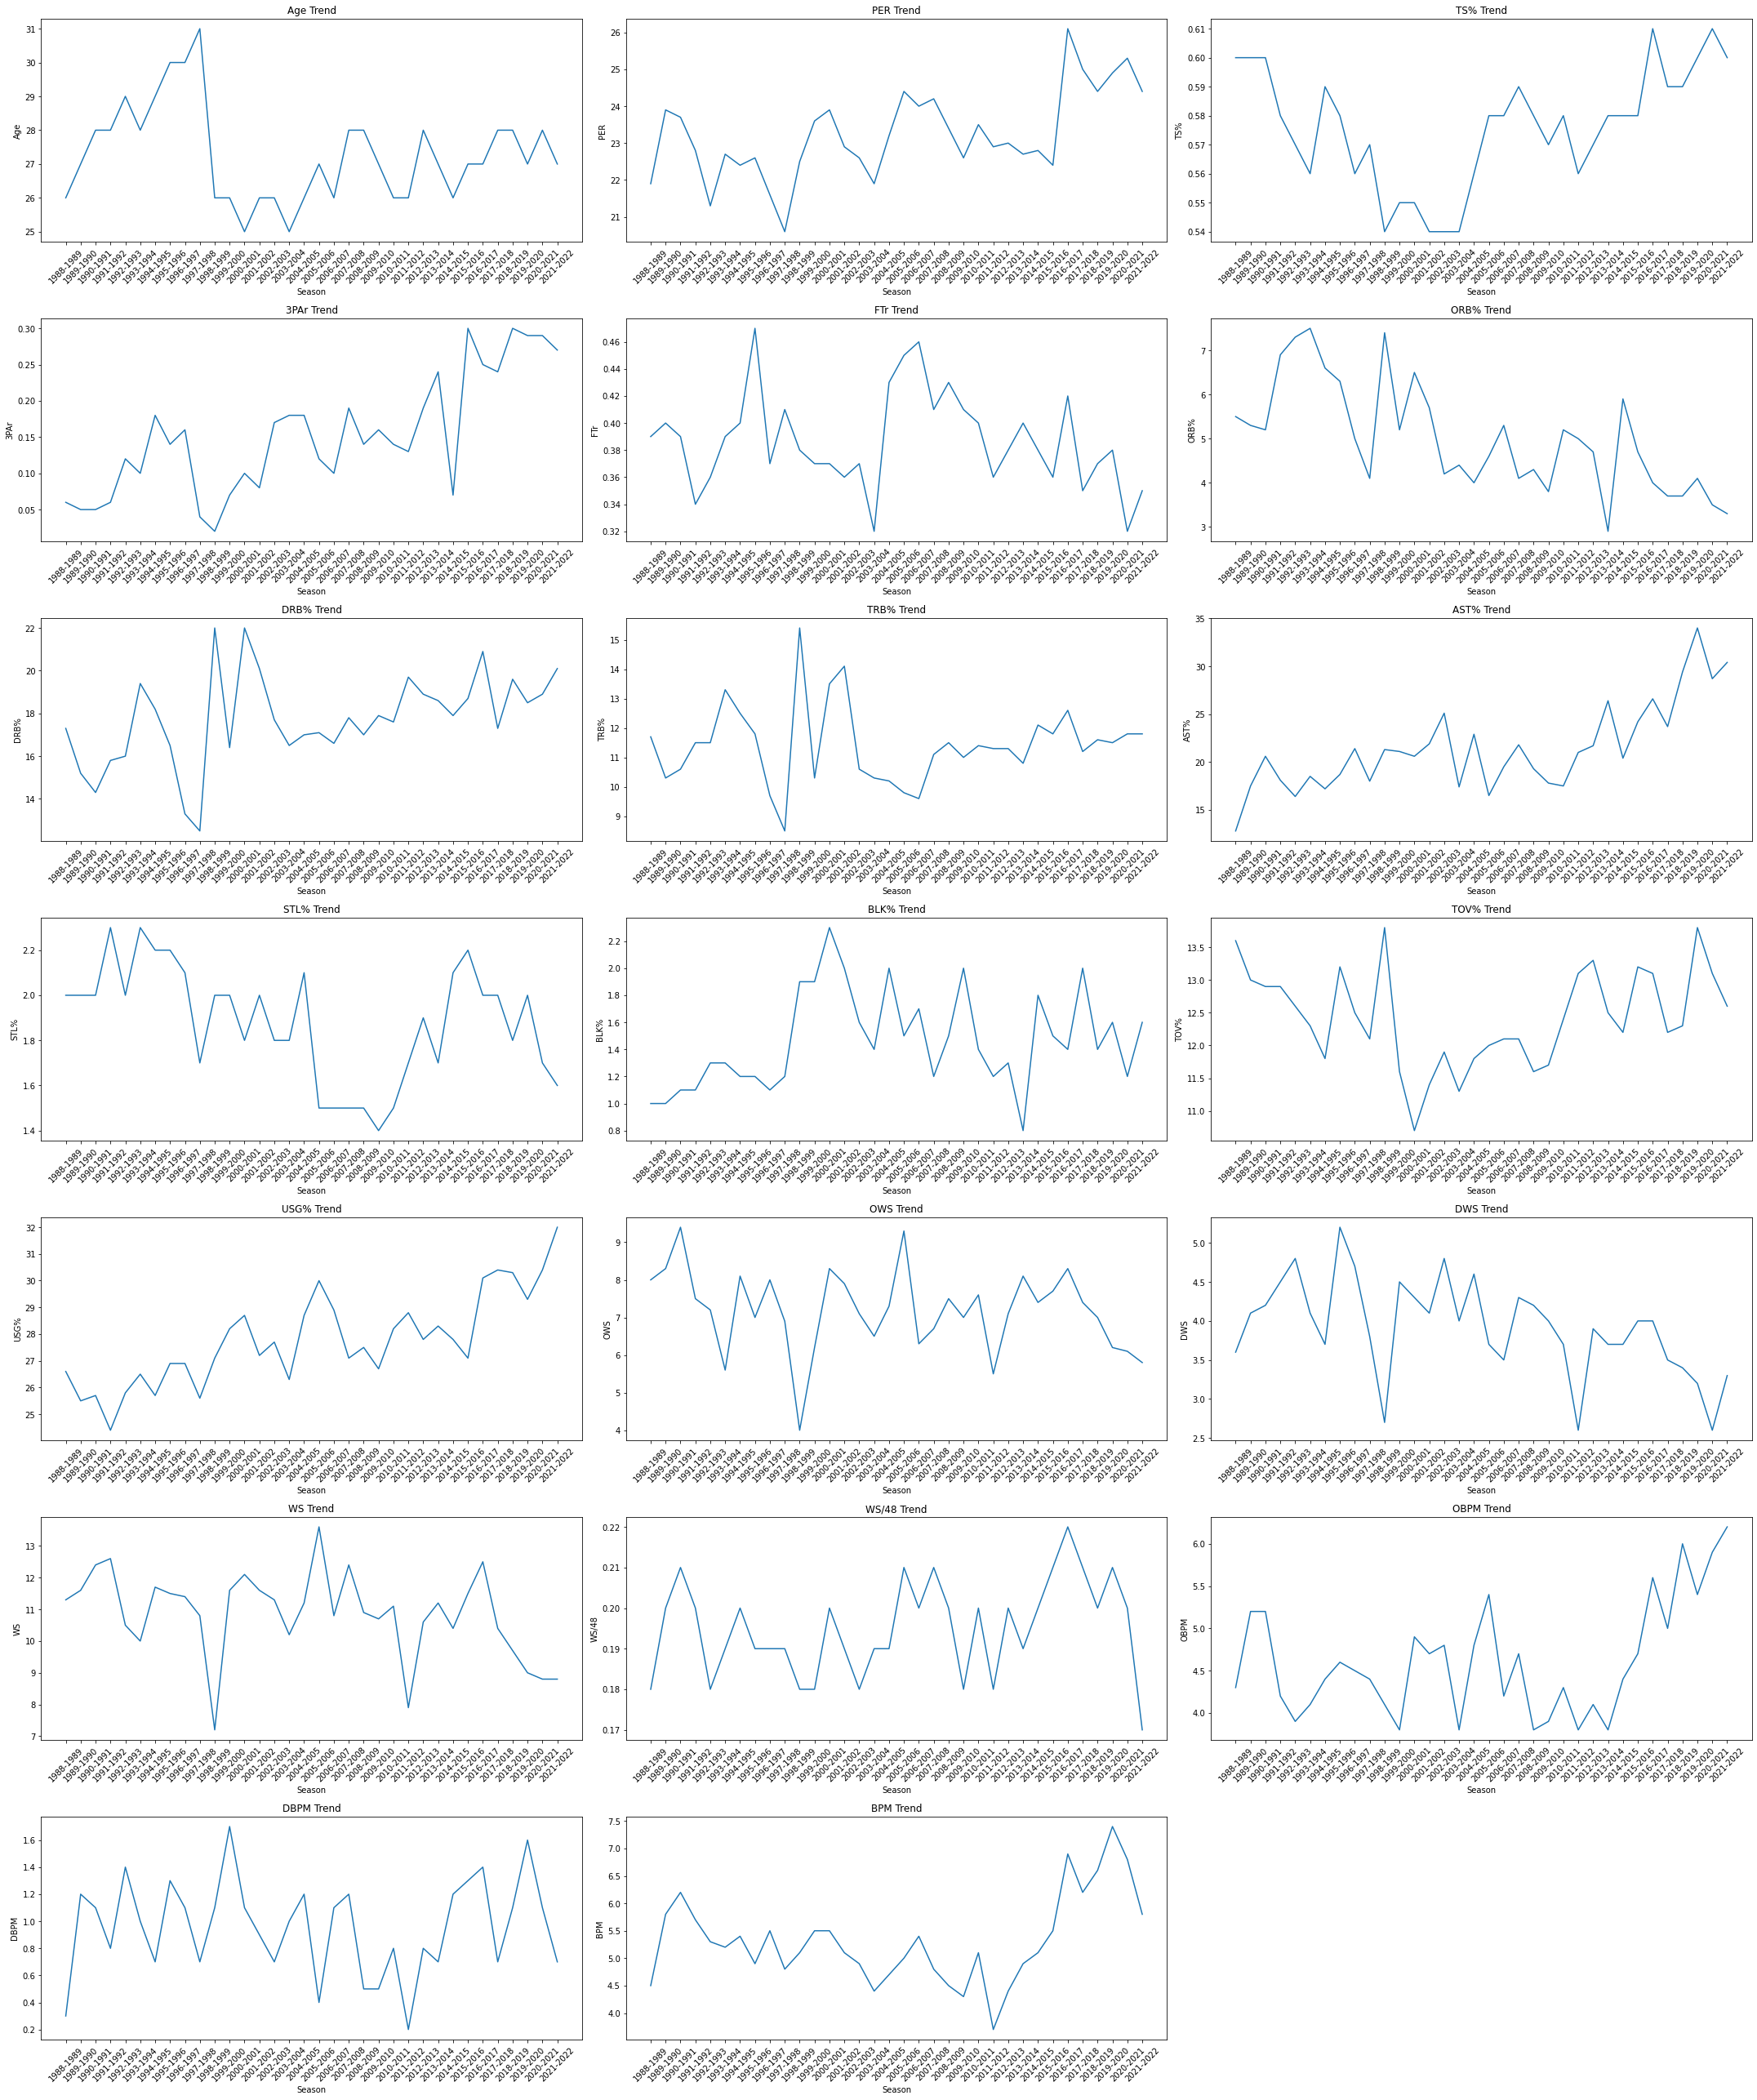

In [138]:
%matplotlib inline 

a = 1
b = 1

fig = plt.figure(figsize = (30,40))

for i in df_group.columns[:-1]:
    ax1 = fig.add_subplot(8,3,a)
    a += 1
    sns.lineplot(x='year', y=i, data=df_group)
    plt.xlabel('Season')
    plt.ylabel(str(i))
    plt.xticks(rotation = 45) 
    plt.title(str(i) + ' Trend')
    fig.tight_layout()
      
plt.savefig('lineplots.jpg')

## Median of Features by Position

If an analysis of the median of the features by season played is undergone then a comparison of this center of measure by position should also be shown. ALthough most recently some NBA pundits believe that the league has transitioned to being position-less, 5 somewhat distinct positions exist on a team which are center (C), power forward (PF), small forward (SF), shooting guard (SG), and point guard (PG). These positions may have some overlap in responsibilities but are in general accomplishing different functions on the court typically. For example, the front-court (forwards and center) may typically be expected to produce more rebounds while the back-court could play a larger role in distributing the ball and scoring. Examining the median for each position would confirm some of these notions.

In [90]:
pd.set_option('display.max_columns', None)
df_group_2 = df_all_NBA.groupby('Pos')[cols_all_list].median()
df_group_2

,Age,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Pos,,,,,,,,,,,,,,,,,,,,,
C,27.0,24.1,0.58,0.01,0.50,10.35,24.80,17.85,11.30,1.3,4.50,12.65,26.65,6.10,4.70,10.90,0.200,2.80,1.8,4.8,4.3
PF,27.0,23.7,0.57,0.04,0.40,8.05,24.00,16.20,16.55,1.6,2.25,11.70,28.20,6.95,4.35,11.15,0.200,4.05,1.1,5.4,5.1
PG,28.0,22.8,0.58,0.27,0.34,2.50,10.35,6.50,40.10,2.3,0.50,14.10,25.80,8.00,3.00,10.60,0.195,5.35,0.4,5.4,5.0
SF,27.0,23.3,0.58,0.20,0.38,4.30,17.10,10.80,21.80,2.0,1.20,12.30,29.40,7.50,3.50,10.80,0.190,5.20,1.2,5.5,5.2
SG,27.0,23.0,0.56,0.22,0.37,3.30,12.20,7.90,24.10,2.2,1.00,11.30,30.90,7.80,3.20,10.70,0.190,5.10,0.4,5.4,4.9


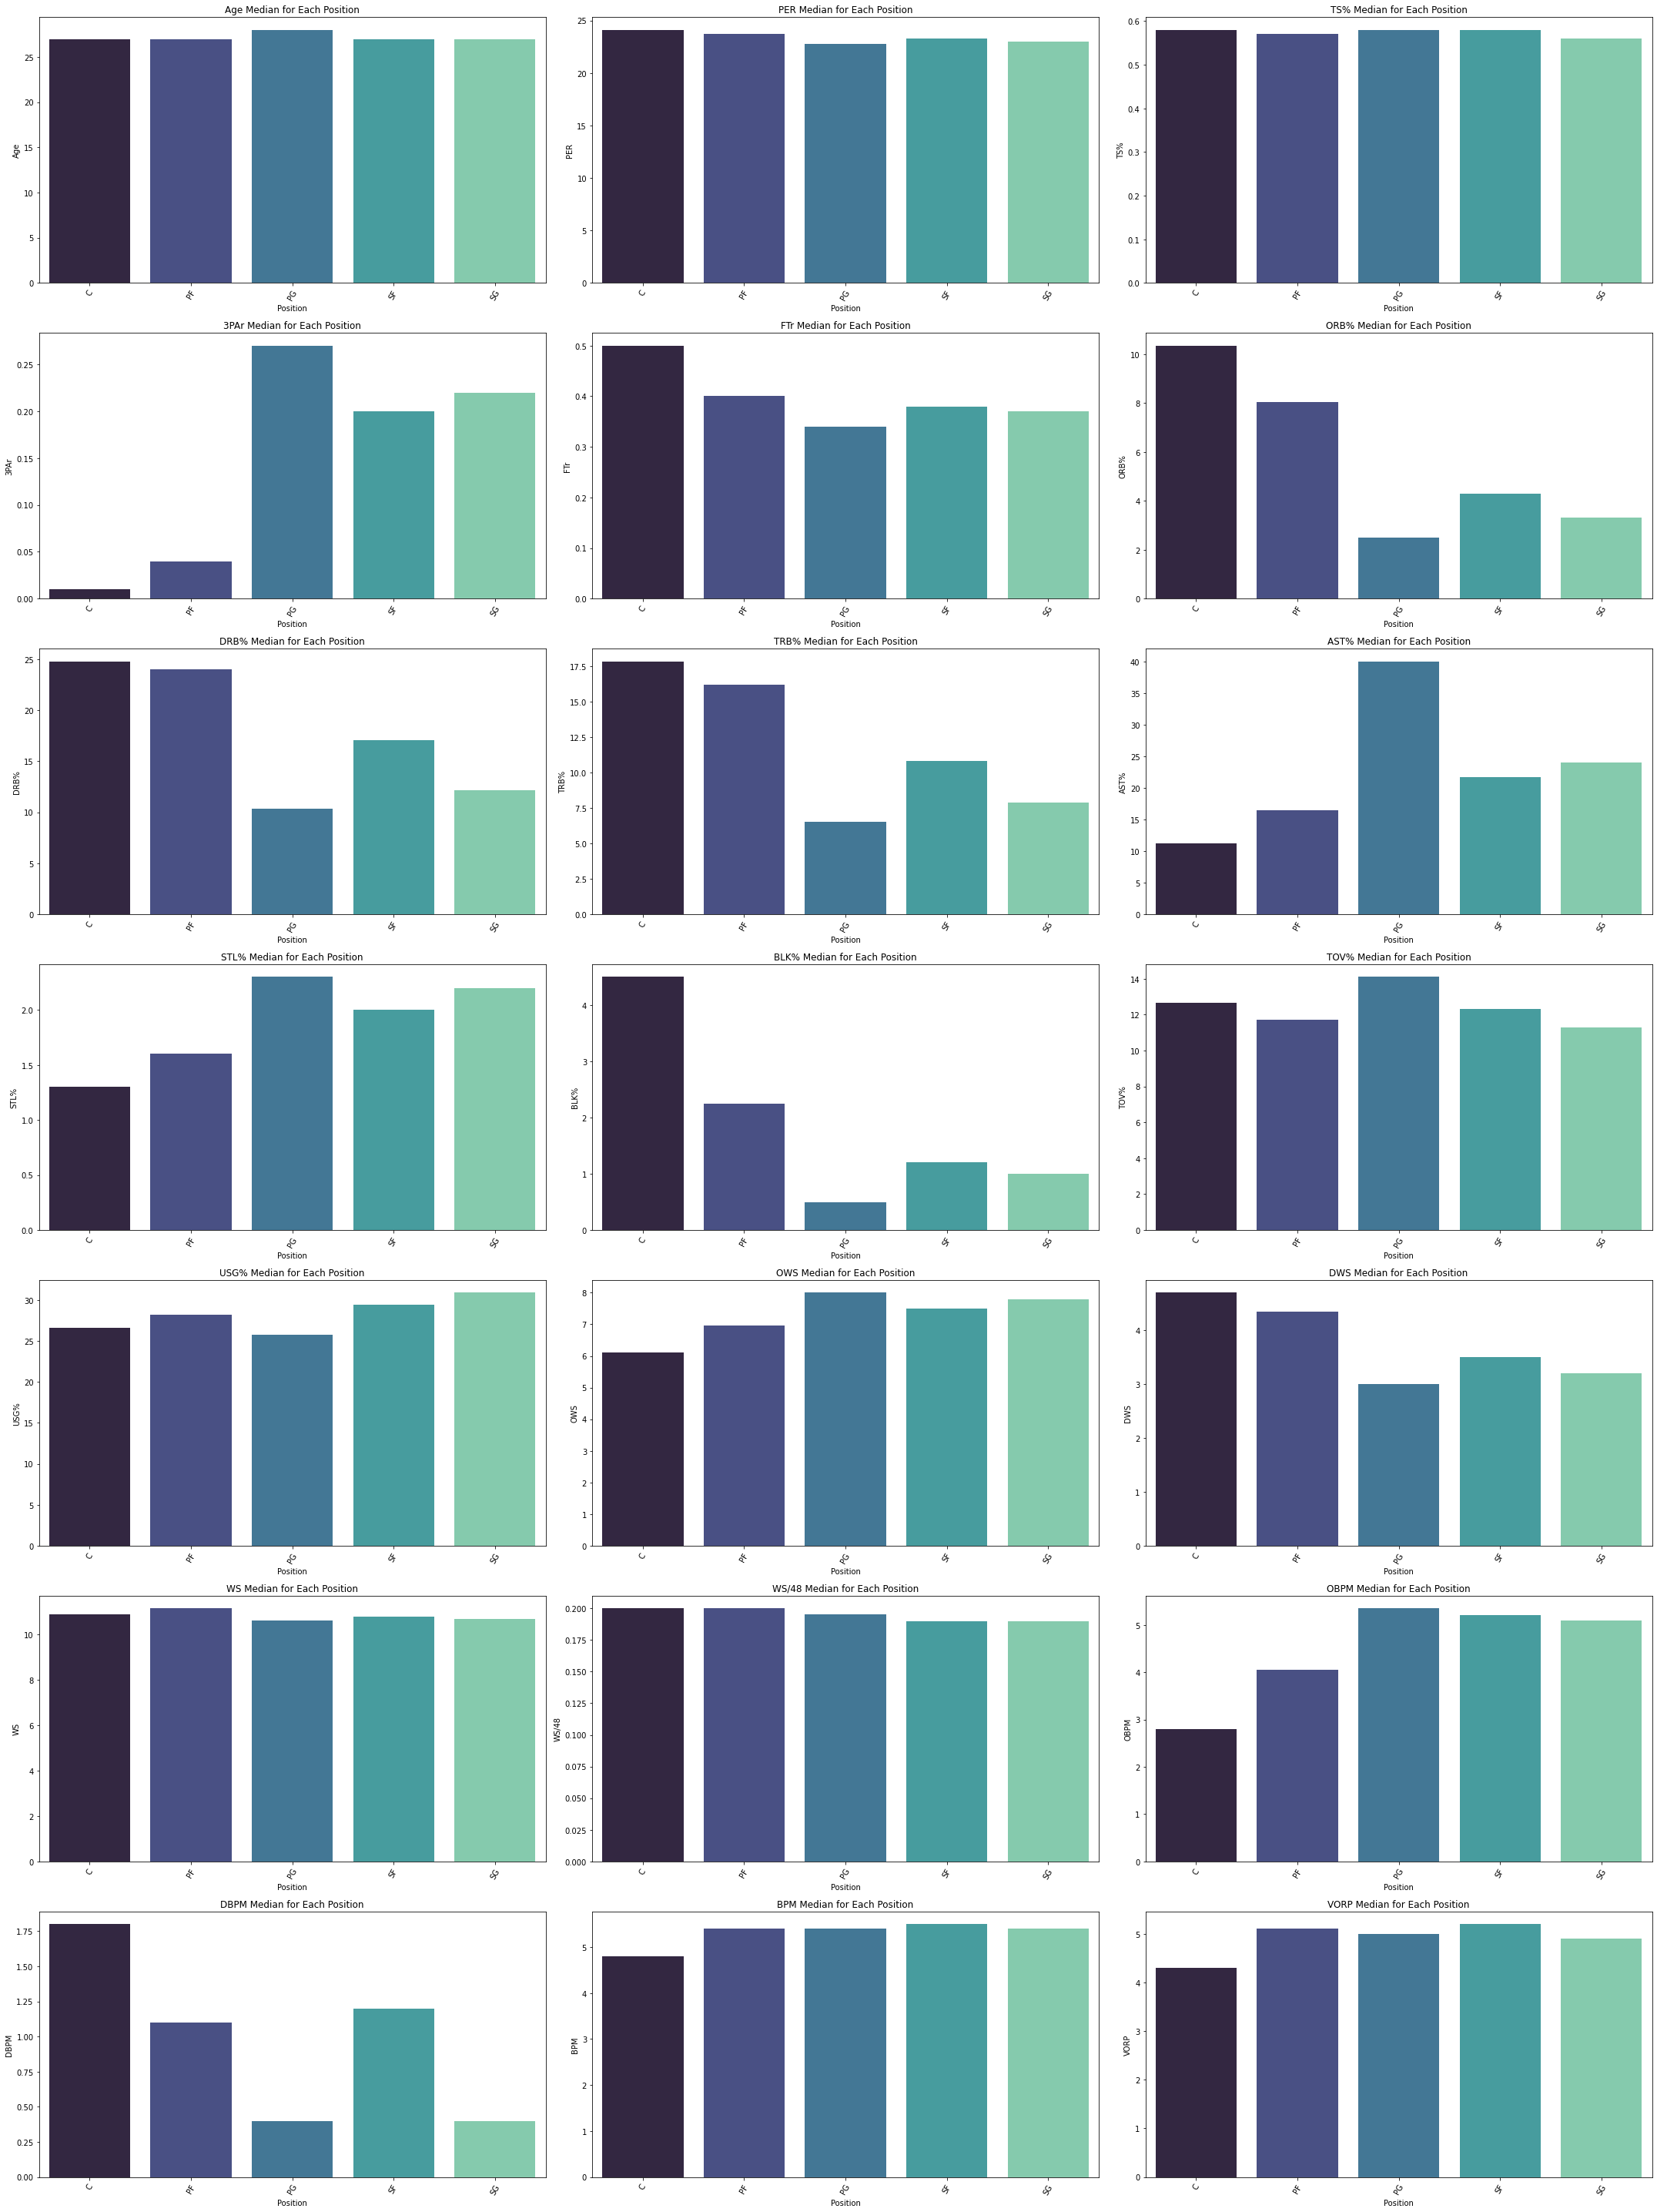

In [100]:
a = 1

fig = plt.figure(figsize = (30,40))

for i in df_group_2.columns:
    ax1 = fig.add_subplot(7,3,a)
    a += 1
    sns.barplot(x=df_group_2.index, y=i, data=df_group_2, palette = "mako")
    plt.xlabel('Position')
    plt.ylabel(str(i))
    plt.xticks(rotation = 60) 
    plt.title(str(i) + ' Median for Each Position')
    fig.tight_layout()
     
plt.show()

There are some easy-takeaways that can be seen from the graphs above that'd indicate there is a difference for the median of our predictors across different positions. For example, `BLK%` (*Block Percentage*) has a much higher median for front-court All-NBA players than back-court All-NBA players. Same goes for any of the predictors that describe rebounding percentages. The opposite phenomenon occurs for a predictor like `STL%` (*Steal Percentage*). There are also some predictors that don't have a great difference in median across positions like `Age`, `PER`, or `TS%`.

## Scatterplot of Variables vs. Share of Votes

Lastly, a scatterplot between the predictors and the share of All-NBA votes will be shown to demonstrate the relationship between the predictors and the response for each group of our `All_NBA_Boolean` response variable. These plots will expand on the previous portions of the EDA related to correlation but also visualize some of the non-All-NBA player's metrics compared to their All-NBA counterparts. Each plot can almost create two distinct spaces where each group of players exist.

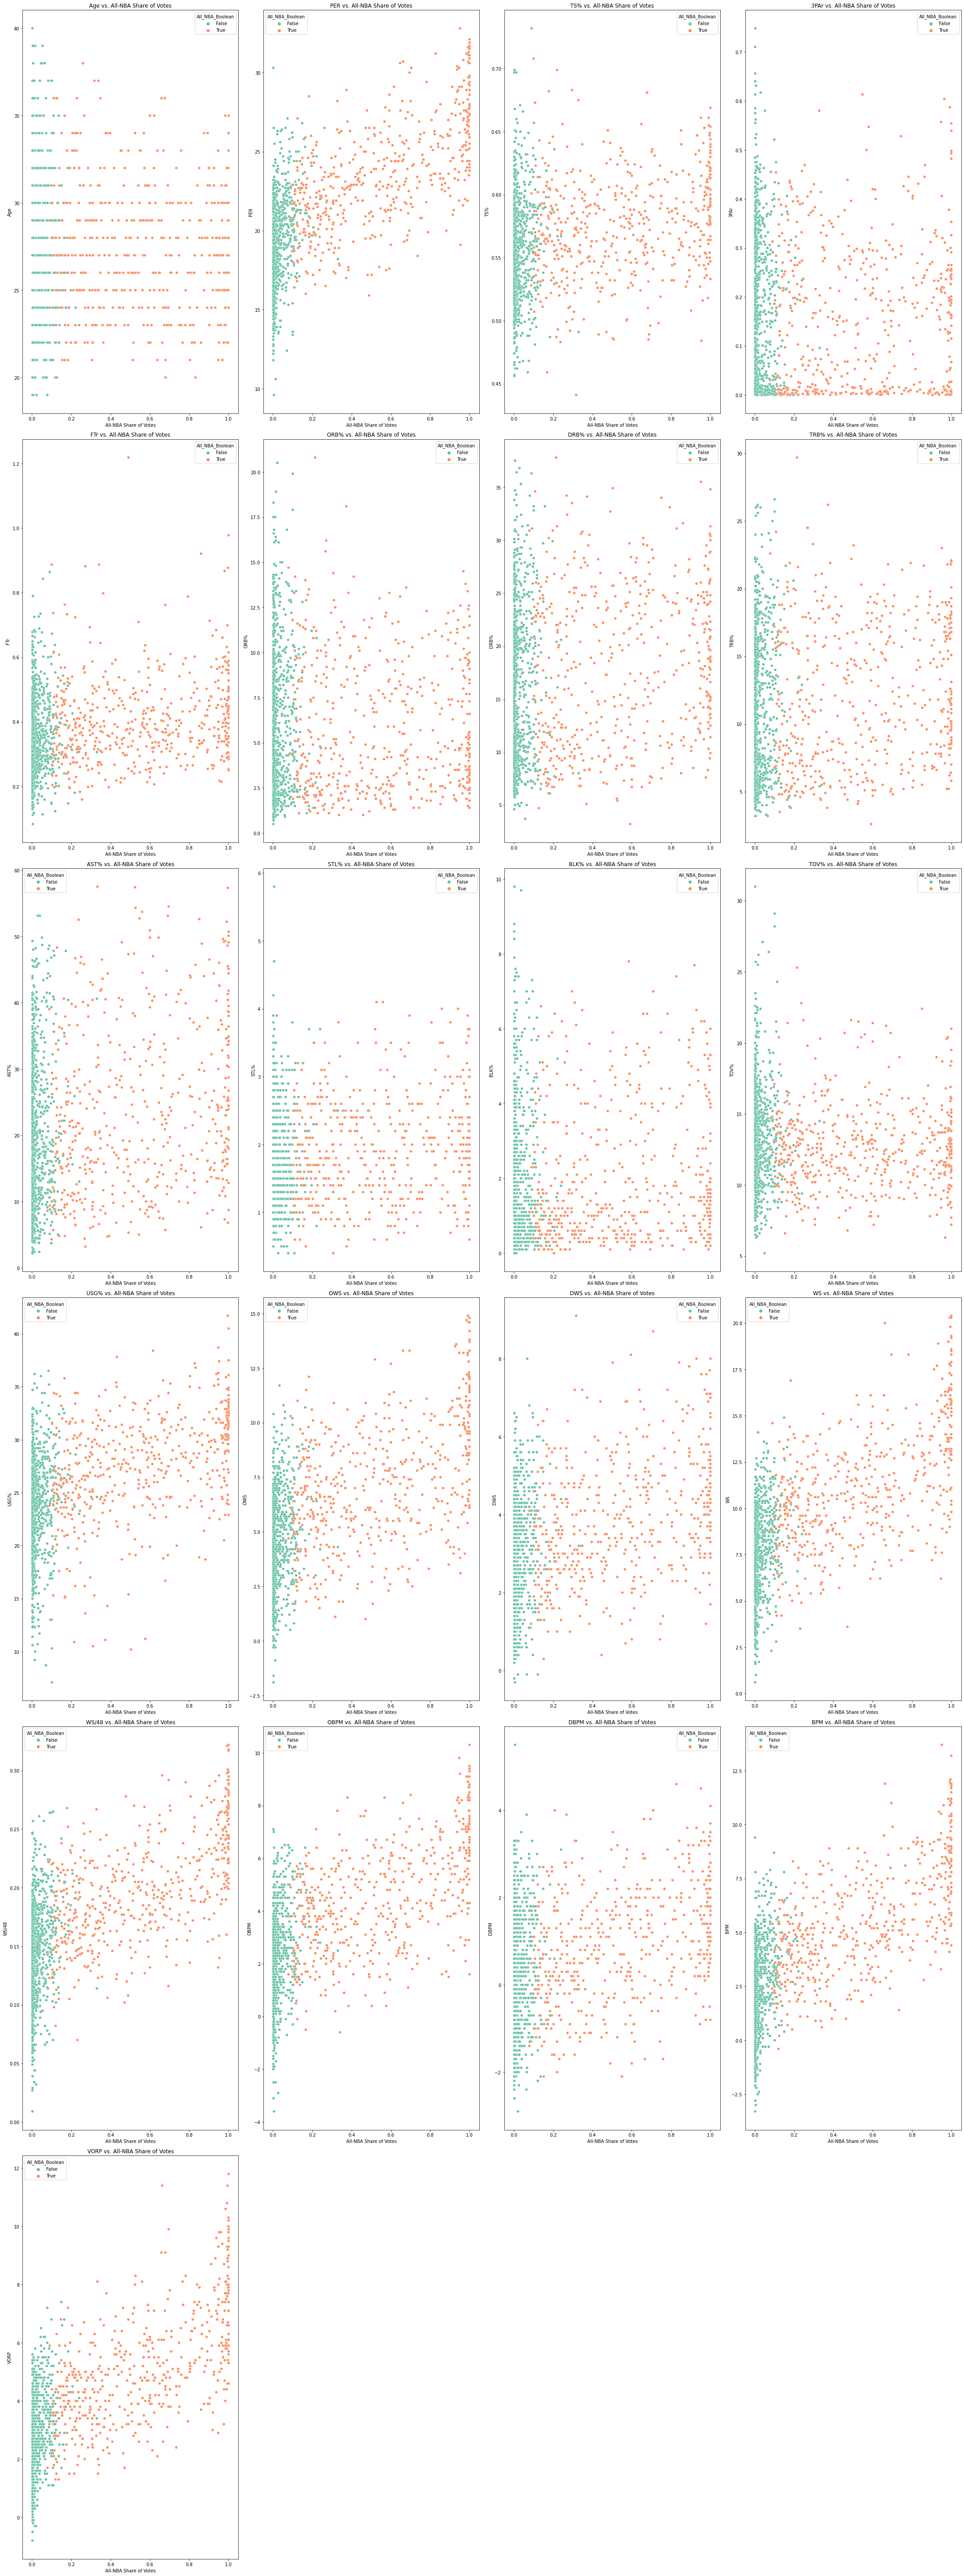

In [140]:
 %matplotlib inline 

a = 1

fig = plt.figure(figsize = (30,80))

for i in cols_all_list[:-1]:
    ax1 = fig.add_subplot(6,4,a)
    a += 1
    sns.scatterplot(x = 'All_NBA_Share', y = i, data = df,
               hue = 'All_NBA_Boolean',
               palette = "Set2")
    plt.xlabel('All-NBA Share of Votes')
    plt.ylabel(str(i))
    plt.title(str(i) + ' vs. All-NBA Share of Votes')
    fig.tight_layout()
  
plt.savefig('scatterplots.jpg')
#plt.show()